# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import abs

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [3]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
223 µs ± 59.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 125.39 MiB, increment: 0.98 MiB


SIZE:  1000
Timing: 
23.1 ms ± 768 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 140.45 MiB, increment: 15.04 MiB


SIZE:  10000
Timing: 
2.36 s ± 40.7 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 2297.74 MiB, increment: 2172.49 MiB




***Zadanie 1.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [ ]:
# 1) Powinniśmy otrzymać takie same wyniki
# 2) Liczby całkowite (int) mają skończoną reprezentację a liczby rzeczywiste (float) mają nieskończoną reprezentacje
# 3) Wyniki się od siebie różnią gdyż komputer zapamiętuje liczby w pamieci w postaci zer i jedynek i gdy liczba jest zbyt duża zachodzi do obcięcia części liczby
# 4) Błąd zaokrągleń
# 5) Tak, jednym z rozwiązań jest możliwość zapisania naszego wyrażenia jako samo c (redukcja dwóch składników b w równaniu) 

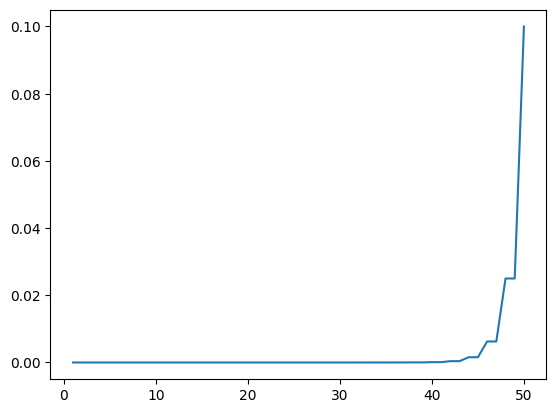

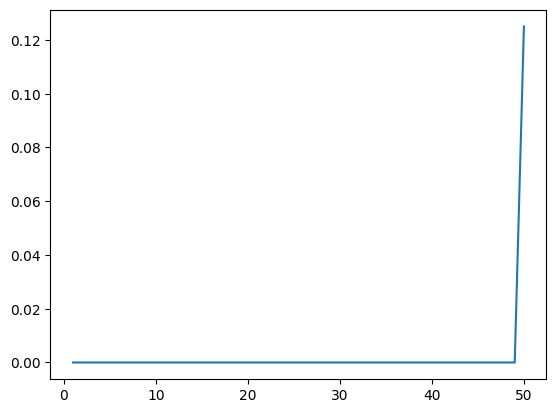

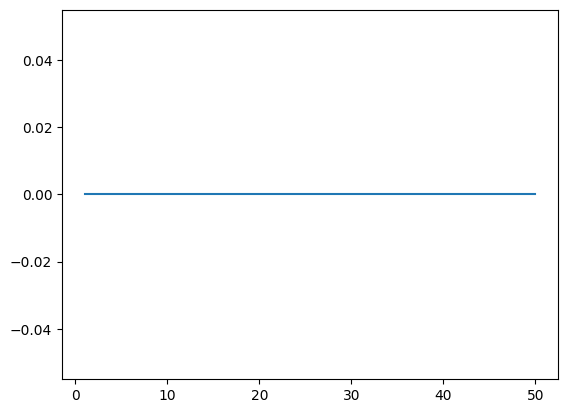

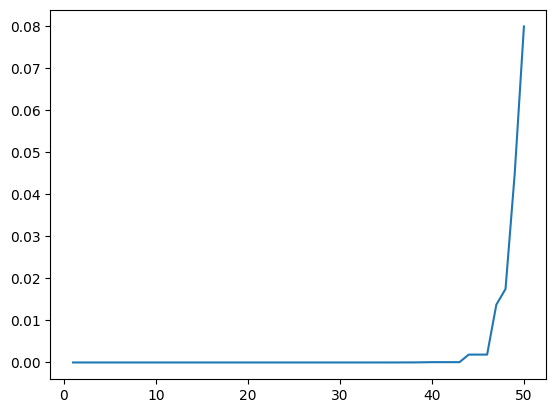

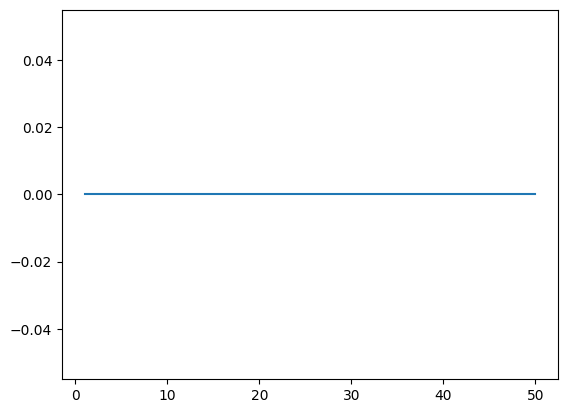

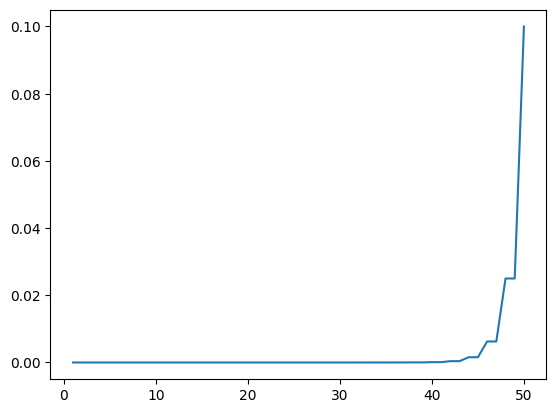

In [4]:
C = [0.1, 0.125, 0.25, 0.33, 0.5, 0.6]
t = np.linspace(1,50)

ans = []

for c in C:
     ans.clear()
     for n in range(1, 51):
          ans.append(main.p_diff(n, c))

     plt.plot(t, ans)
     plt.show()
          
     

***Zadanie 2.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

Dla n = 1 oraz e = 1.0 błąd bezwzględny wynosi = 1.71828183, błąd względny = 0.63212056

Dla n = 2 oraz e = 2.0 błąd bezwzględny wynosi = 0.71828183, błąd względny = 0.26424112

Dla n = 3 oraz e = 2.5 błąd bezwzględny wynosi = 0.21828183, błąd względny = 0.08030140

Dla n = 4 oraz e = 2.6666666666666665 błąd bezwzględny wynosi = 0.05161516, błąd względny = 0.01898816

Dla n = 5 oraz e = 2.708333333333333 błąd bezwzględny wynosi = 0.00994850, błąd względny = 0.00365985

Dla n = 6 oraz e = 2.7166666666666663 błąd bezwzględny wynosi = 0.00161516, błąd względny = 0.00059418

Dla n = 7 oraz e = 2.7180555555555554 błąd bezwzględny wynosi = 0.00022627, błąd względny = 0.00008324

Dla n = 8 oraz e = 2.7182539682539684 błąd bezwzględny wynosi = 0.00002786, błąd względny = 0.00001025

Dla n = 9 oraz e = 2.71827876984127 błąd bezwzględny wynosi = 0.00000306, błąd względny = 0.00000113

Dla n = 10 oraz e = 2.7182815255731922 błąd bezwzględny wynosi = 0.00000030, błąd względny = 0.00000011



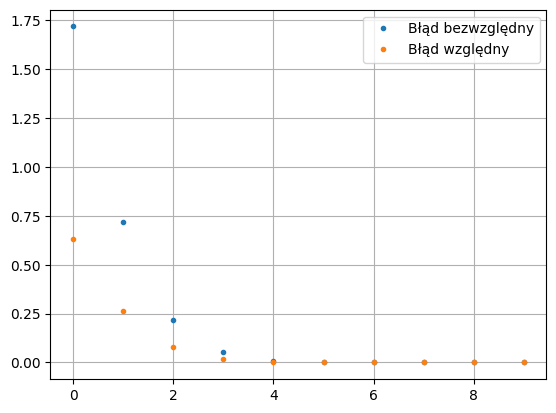

In [7]:
# 1) Błąd przybliżeń
# 2) Poniżej kod

abs_error = np.zeros(10)
rel_error = np.zeros(10)

for n in range(10):
    abs_error[n] = abs.absolut_error(np.exp(1), main.exponential(1, n+1))
    rel_error[n] = abs.relative_error(np.exp(1), main.exponential(1, n+1))
    print(f"Dla n = {n + 1} oraz e = {main.exponential(1, n + 1)} błąd bezwzględny wynosi = {abs_error[n] :.8f}, błąd względny = {rel_error[n] :.8f}\n")

plt.plot(abs_error, ".", label = "Błąd bezwzględny")
plt.plot(rel_error, ".", label = "Błąd względny")
plt.legend(["Błąd bezwzględny","Błąd względny"])
plt.grid()
plt.show()

***Zadania 3.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [10]:
# metoda numer 1
print(print(f"x = pi/4, k = {3}, cos(3pi/4) = {main.coskx1(3, np.pi/4)} \n"))
print(print(f"x = pi/4, k = {6}, cos(3pi/2) = {main.coskx1(6, np.pi/4)} \n"))
print(print(f"x = pi/4, k = {9}, cos(9pi/4) = {main.coskx1(9, np.pi/4)} \n"))

# metoda numer 2
print(f"x = pi/4, k = {3}, cos(3pi/4) = {main.coskx2(3, np.pi/4)[0]}, sin(3pi/4) = {main.coskx2(3, np.pi/4)[1]} \n") 
print(f"x = pi/4, k = {6}, cos(3pi/2) = {main.coskx2(6, np.pi/4)[0]}, sin(3pi/2) = {main.coskx2(6, np.pi/4)[1]} \n") 
print(f"x = pi/4, k = {9}, cos(9pi/4) = {main.coskx2(9, np.pi/4)[0]}, sin(9pi/4) = {main.coskx2(9, np.pi/4)[1]} \n") 

x = pi/4, k = 3, cos(3pi/4) = -0.7071067811865472 

None
x = pi/4, k = 6, cos(3pi/2) = -3.3306690738754696e-16 

None
x = pi/4, k = 9, cos(9pi/4) = 0.7071067811865479 

None
x = pi/4, k = 3, cos(3pi/4) = -0.7071067811865477, sin(3pi/4) = 0.7071067811865477 

x = pi/4, k = 6, cos(3pi/2) = 0.0, sin(3pi/2) = -1.0000000000000002 

x = pi/4, k = 9, cos(9pi/4) = 0.7071067811865477, sin(9pi/4) = 0.7071067811865477 



***Zadanie 4.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 2 w zależności od różnych wartości $N$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby $e$ w zależności od $N$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby $e$ od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

2.81 µs ± 808 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.44 µs ± 775 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.34 µs ± 467 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.32 µs ± 410 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.2 µs ± 226 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.24 µs ± 256 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.29 µs ± 376 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.33 µs ± 398 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.27 µs ± 291 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.22 µs ± 164 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)


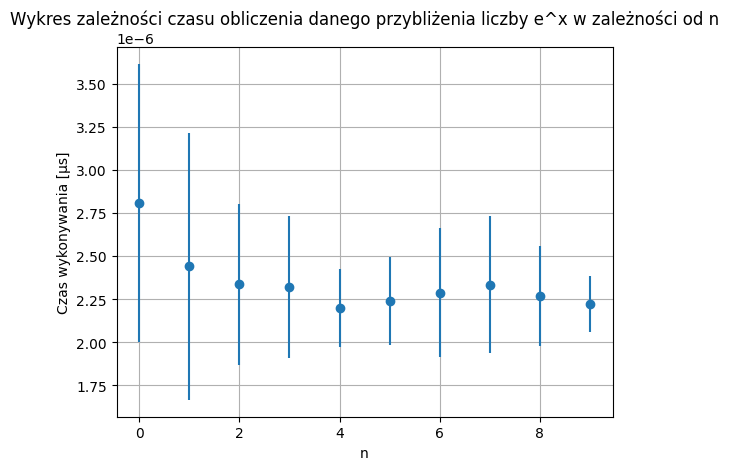

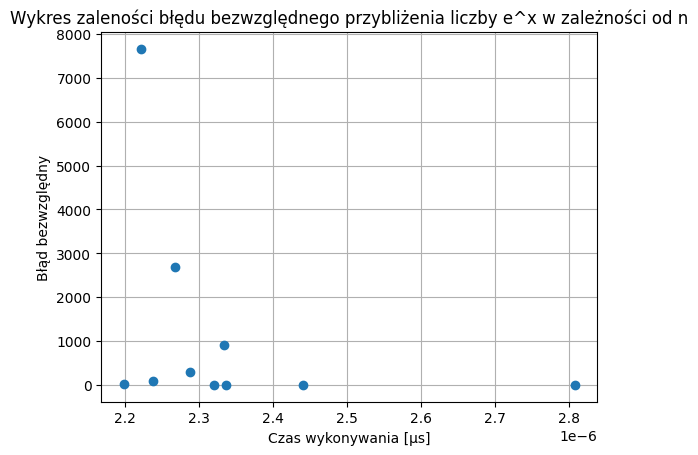

In [13]:
time = np.zeros(10)
dev = np.zeros(10)
x = np.arange(0,10,1)

error = np.zeros(10)


for n in range(10):
    saved_timing = %timeit -r 5 -n 10 -o main.exponential(n, 5)
    time[n] = saved_timing.average
    dev[n] =saved_timing.stdev
    error[n] = abs.absolut_error(main.exponential(n, 5), np.exp(n))


plt.errorbar(x, time, yerr=dev, ls="none", marker="o")
plt.title("Wykres zależności czasu obliczenia danego przybliżenia liczby e^x w zależności od n")
plt.xlabel("n")
plt.ylabel("Czas wykonywania [µs]")
plt.grid()
plt.show()

plt.plot(time, error, "o")
plt.title("Wykres zaleności błędu bezwzględnego przybliżenia liczby e^x w zależności od n")
plt.xlabel("Czas wykonywania [µs]")
plt.ylabel("Błąd bezwzględny")
plt.grid()
plt.show()